In [14]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as pl
%matplotlib notebook

# Reading from data

In [2]:
# First Data

all_data=[]
h= 0
with open('COVID19_open_line_list.csv', newline = '') as players_data:
    game_reader = csv.reader(players_data, delimiter=',')
    for game in game_reader:
        if h==0:print([game[4],game[5],game[10],game[11]]) #,game[12],game[17]
        if h>0 and game[5] is not '' and game[10] is not '' and game[11] is not '': 
            all_data.append([game[4],game[5],game[10],game[11]]) #,game[12],game[17]
        h+=1

['province', 'country', 'date_onset_symptoms', 'date_admission_hospital']


In [3]:
# Number of Cases

x1 = len(all_data)
print(x1)

570


In [4]:
# Second Data

h= 0
with open('Kudos to DXY.cn Last update_ 03_11_2020,  11_00 AM (EST) - Sheet7.csv', newline = '') as players_data:
    game_reader = csv.reader(players_data, delimiter=',')
    for game in game_reader:
        if h==0: print([game[3],game[4],game[7],game[9]])
        if h>0: 
            j1 = datetime.strptime(game[7], "%m/%d/%Y").strftime("%d.%m.%Y")
            j2 = datetime.strptime(game[9], "%m/%d/%Y").strftime("%d.%m.%Y")
            all_data.append([game[3],game[4],j1,j2]) #,game[12],game[17]
        h+=1

['location', 'country', 'symptom_onset', 'hosp_visit_date']


In [5]:
# Number of Cases

x2 = len(all_data)
print(x2-x1)

166


In [6]:
# Third Data

with open('leilas_data.csv', newline = '') as players_data:
    game_reader = csv.reader(players_data, delimiter='\t')
    for game in game_reader:
        if len(game)==22:
            data=[]
            ind=0
            for en in game:
                if ind in [5,6,12,13]:
                    data.append(en)
                ind +=1
            f1,f2 = 0, 0
            try: 
                j1 = datetime.strptime(data[2], "%m/%d/%Y").strftime("%d.%m.%Y")
            except ValueError: 
                f1 = 1
            try: 
                j2 = datetime.strptime(data[3], "%m/%d/%Y").strftime("%d.%m.%Y")
            except ValueError: 
                f2 = 1    
            if f1==0 and f2==0: all_data.append([data[0],data[1],j1,j2])

In [7]:
# Number of Cases

x3 = len(all_data)
print(x3-x2)

58


In [8]:
# Forth Data

h= 0
r0,r1,r2 = 0,0,0
with open('Wolfram-ImageIdentify-Net-V1 2.csv', newline = '') as players_data:
    game_reader = csv.reader(players_data, delimiter=',')
    for game in game_reader:
        if h==0: print(game)
            
        if h>0 and game[3] is not '' and game[4] is not '': 
            
            
            if game[1] is not '': w1 = game[1].split(',')[0]  # find Provience
            elif game[0] is not '': w1 =game[0].split(', ')[1]
            else: 
                r1 += 1
                w1 = ''
            
            if game[2] is not '': w2 = game[2] # find Country
            elif game[0] is not '': w2 =game[0].split(', ')[2]
            elif game[1] is not '': w2 =game[1].split(', ')[1]
            else: 
                r2 += 1
                w2 = ''
            
            j1 = datetime.strptime(game[3], "%Y, %m, %d").strftime("%d.%m.%Y")
            j2 = datetime.strptime(game[4], "%Y, %m, %d").strftime("%d.%m.%Y")
            if w2 is not '': 
                if w2=='SouthKorea': w2 = 'South Korea'
                all_data.append([w1,w2,j1,j2])
                r0 += 1
            
            del w1,w2
        h+=1

['City', 'AdministrativeDivision', 'Country', 'DateOfOnsetSymptoms', 'DateOfAdmissionHospital', 'DateOfConfirmation']


In [9]:
r0,r1,r2

(625, 85, 0)

In [10]:
# Number of Cases

x4 = len(all_data)
print(x4-x3)

625


# Counting day differences between date of hospitalization from date of onset symptom for all cases in each country

In [11]:
r0=[i[0] for i in all_data] # Province
r1=[i[1] for i in all_data] # Country
r2=[i[2] for i in all_data] # Onset_symptoms
r3=[i[3] for i in all_data] # Admission_hospital

In [12]:
r11=np.unique(r1)
e,g ={},{}
for i in r11:
    n = -1
    print(i)
    er =len([y for y in r1 if y==i])
    print(er)
    gg = 0
    if er>5:
        e[i]=[]
        for j in r1:
            n += 1   
            if j==i: 
                f = (datetime.strptime(r3[n], '%d.%m.%Y')-datetime.strptime(r2[n], '%d.%m.%Y')).days
                if f>-1: 
                    gg += 1
                    e[i].append(f)
        g[i]=gg

Australia
10
Bhutan
1
Cambodia
2
Canada
6
China
1011
Croatia
1
France
12
Germany
9
Hong Kong
3
Italy
2
Japan
115
Malaysia
6
Nepal
2
Romania
3
Singapore
138
South Korea
38
Spain
9
Switzerland
1
Taiwan
17
Thailand
6
UK
6
USA
2
United States
2
UnitedStates
4
Vietnam
13


# Ploting countries with more than 5 Cases

<IPython.core.display.Javascript object>


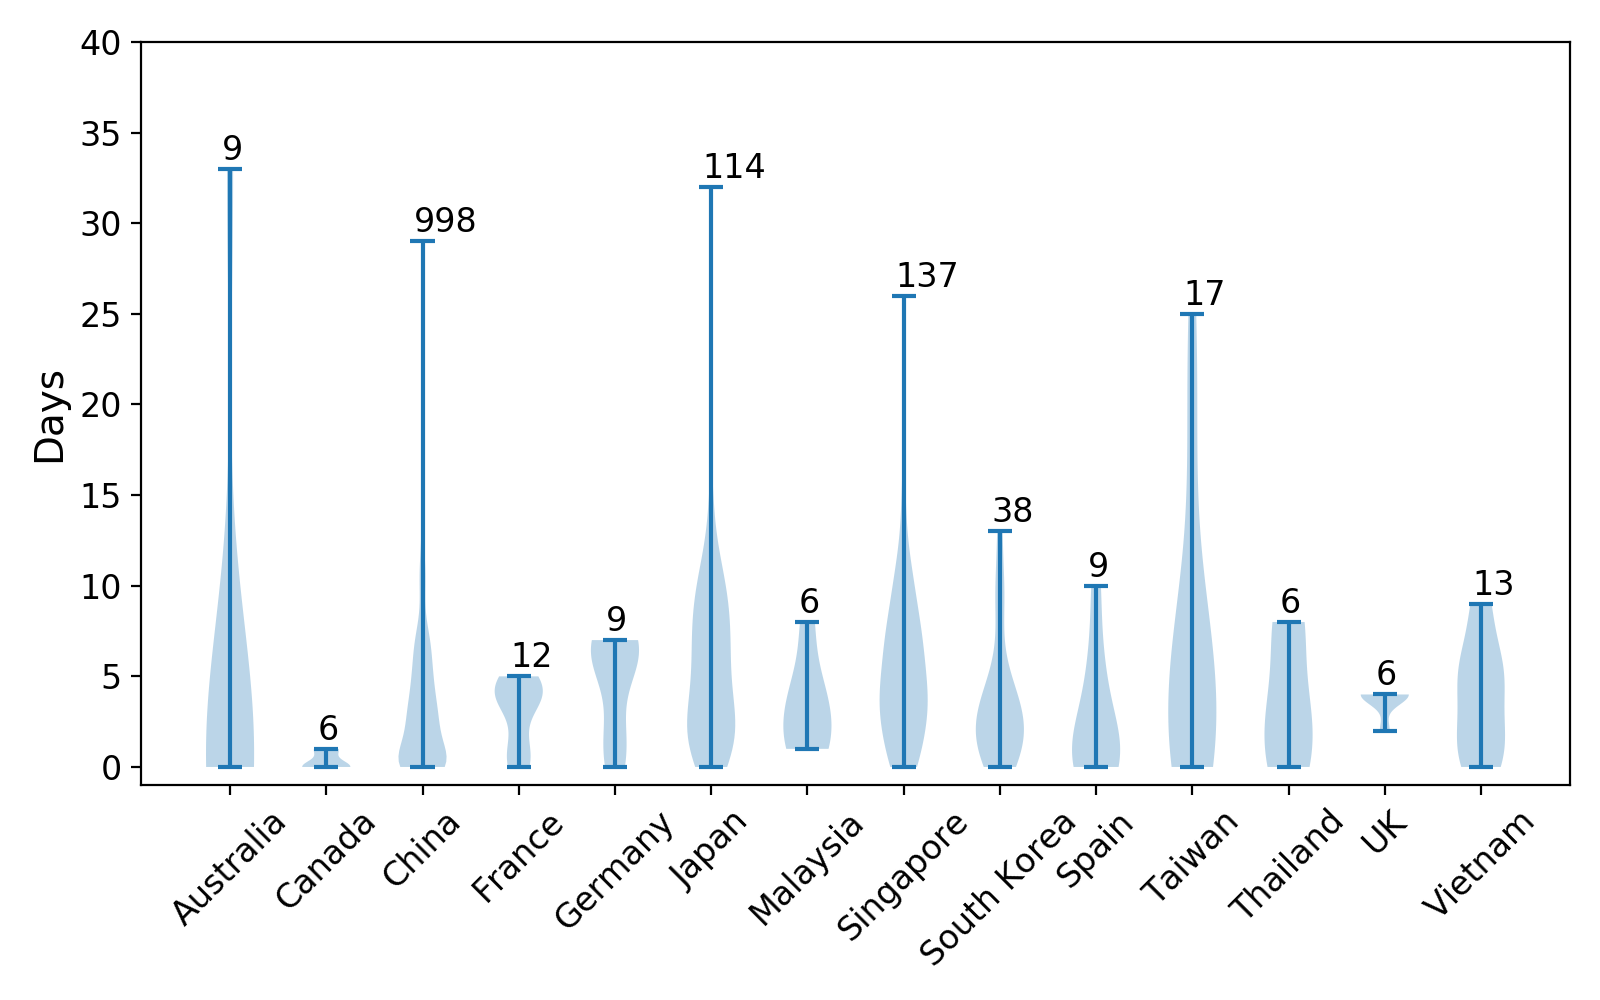

In [15]:
re =[e[i] for i in e.keys()]
pl.figure(figsize=(8,5))
pl.violinplot(re)
j = 0
for i in g.keys():
    j +=1
    pl.text(j-0.09,max(e[i])+0.5, r'{}'.format(g[i]),fontsize=12)
pl.xticks(np.arange(1,len(e.keys())+1),e.keys(),rotation=45)
pl.ylim(-1,40)
pl.ylabel('Days',fontsize=14)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.tight_layout()

# Seperating Day differences for different regimes of China

In [16]:
r11=np.unique(r1)
e1,e2,e3,e4 =[],[],[],[]
n,n1,n2,n3,n4 = 0,0,0,0,0
for j in range(len(r1)):
    if r1[j]=='China': 
        d1 =(datetime.strptime(r2[j], '%d.%m.%Y')).day
        m1 =(datetime.strptime(r2[j], '%d.%m.%Y')).month
        
        f = (datetime.strptime(r3[j], '%d.%m.%Y')-datetime.strptime(r2[j], '%d.%m.%Y')).days
        if f>-1:
            n += 1
            if m1==12:
                e1.append(f)
                n1 += 1
            elif d1<=28 and m1==1: 
                e1.append(f)
                n1 += 1
            elif d1>28 and m1==1: 
                e2.append(f)
                n2 += 1
            elif d1<=4 and m1==2: 
                e2.append(f)
                n2 += 1
            elif d1>4 and m1==2: 
                if d1<=11:
                    e3.append(f)
                    n3 += 1
                else:
                    e4.append(f)
                    n4 += 1 

In [17]:
print(n,n1,n2,n3,n4,n1+n2+n3+n4)

998 764 190 24 20 998


<IPython.core.display.Javascript object>


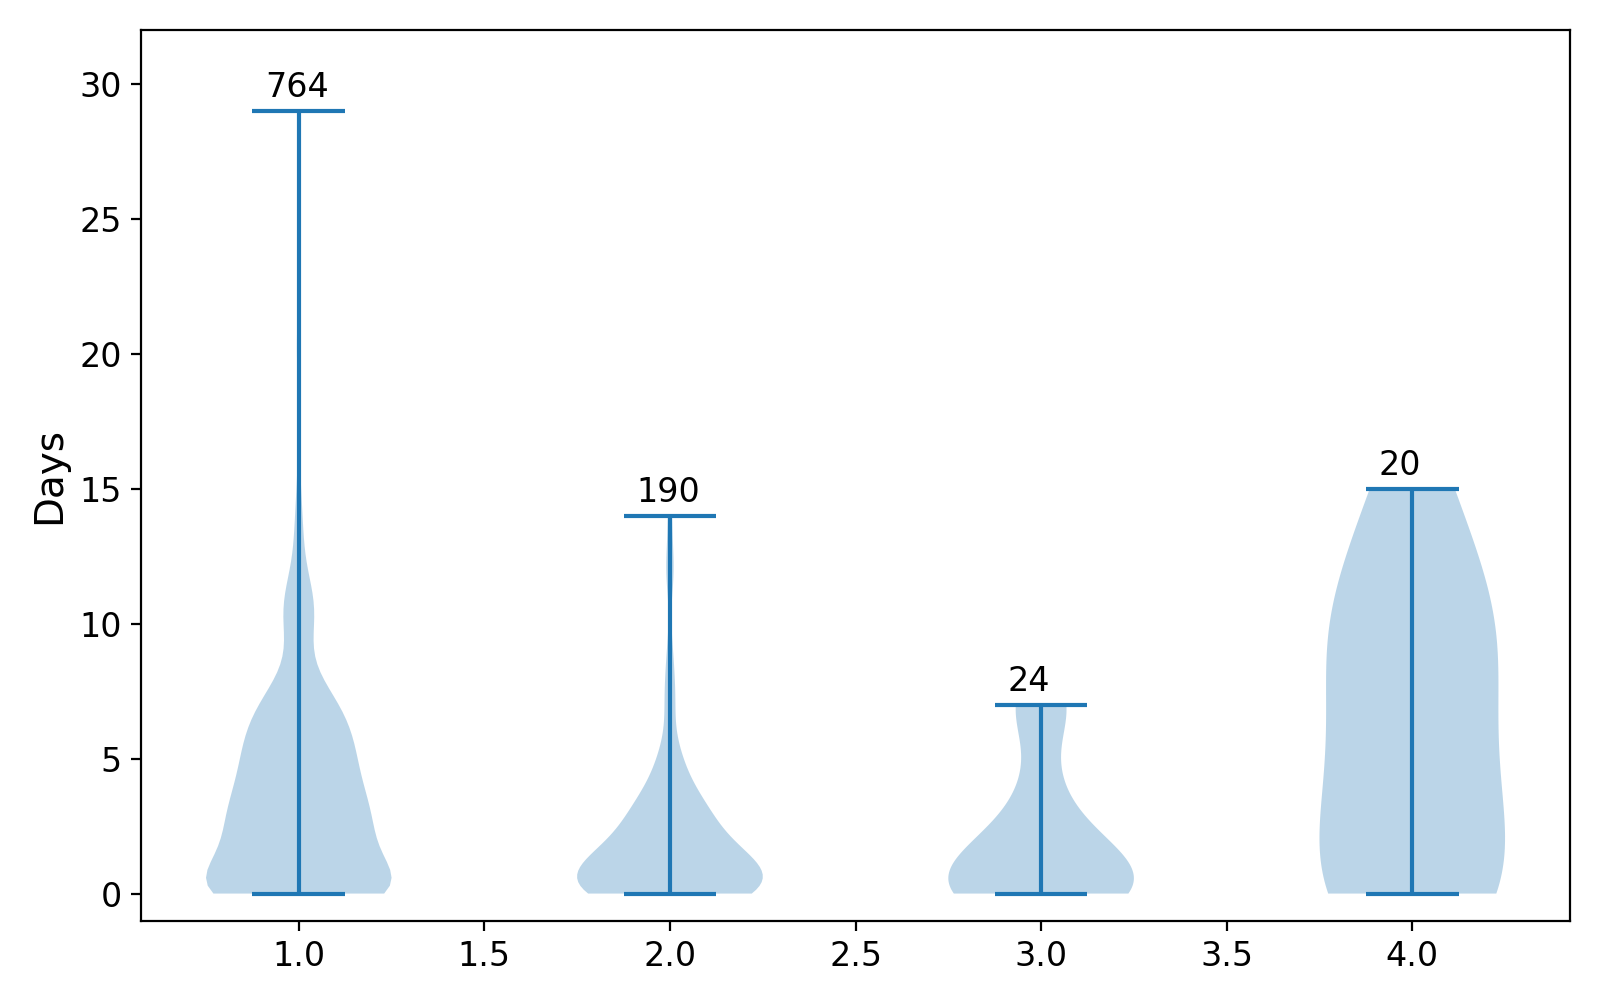

In [18]:
pl.figure(figsize=(8,5))
pl.violinplot([e1,e2,e3,e4])
r = [n1,n2,n3,n4]
j = 0
for i in [e1,e2,e3,e4]:
    j +=1
    pl.text(j-0.09,max(i)+0.5, r'{}'.format(r[j-1]),fontsize=12)
pl.ylabel('Days',fontsize=14)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.ylim(-1,32)
pl.tight_layout()

# Seperating Day differences for different regimes of Singapore

In [338]:
r11=np.unique(r1)
e1,e2 =[],[]
n,n1,n2 = 0,0,0
for j in range(len(r1)):
    if r1[j]=='Singapore': 
        d1 =(datetime.strptime(r2[j], '%d.%m.%Y')).day
        m1 =(datetime.strptime(r2[j], '%d.%m.%Y')).month
        
        f = (datetime.strptime(r3[j], '%d.%m.%Y')-datetime.strptime(r2[j], '%d.%m.%Y')).days
        if f>-1:
            n += 1
            if m1==12 or m1==1 or m1==2:
                e1.append(f)
                n1 += 1
            elif d1<=4 and m1==3: 
                e1.append(f)
                n1 += 1
            elif d1>4 and m1==3: 
                e2.append(f)
                n2 += 1

In [194]:
print(n,n1,n2,n1+n2)

68 68 0 68
